In [7]:
%reload_ext autoreload
%autoreload 2


import numpy as np

from asi import path_config

root = path_config.image_of_coin
print(root)


/Users/hagayuya/Library/CloudStorage/GoogleDrive-haga.yuya2.2016@gmail.com/マイドライブ/ASI/Image of coin (Senop camera)


In [8]:
dat_path = root / "HSI_snapshot__20212101144836.dat"
header_path = root / "HSI_snapshot__20212101144836.hdr"

In [9]:
from asi import load_envi_header



In [10]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

# root = Path("Image of coin (Senop camera)")
dat_path = root / "HSI_snapshot__20212101144836.dat"
header_path = root / "HSI_snapshot__20212101144836.hdr"

header = load_envi_header(header_path)

interleave = header["interleave"]
samples = header["samples"]
lines = header["lines"]
bands = header["bands"]
print(interleave)

with dat_path.open("rb") as fopen:
    raw_array = np.fromfile(fopen, dtype=">u2")

BSQ


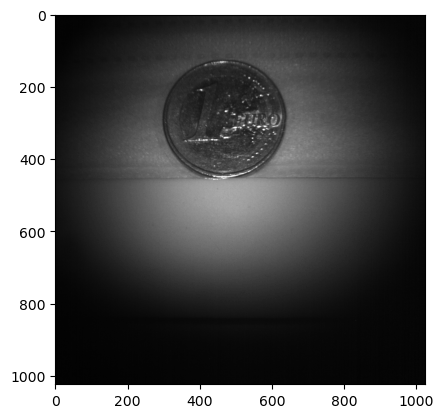

In [11]:
# Convert the string values of samples, lines, and bands to integers
samples = int(samples)
lines = int(lines)
bands = int(bands)

# Reshape the raw_array based on BSQ interleave
raw_image = raw_array.reshape((bands, samples, lines))
raw_image = np.transpose(raw_image, (1, 2, 0))


fig, axes = plt.subplots(2, 1, tight_layout=True)
axes[0].imshow(raw_image[:, :, 4], cmap="gray")
axes[0].set_title("Preview of spectral image at 4th band")

axes[1].plot(raw_image[100, 100, :])
axes[1].set_title("Spectra at 100th lineand 100th sample")
axes[1].set_xlabel("Band")
plt.show()

In [13]:
bands

18

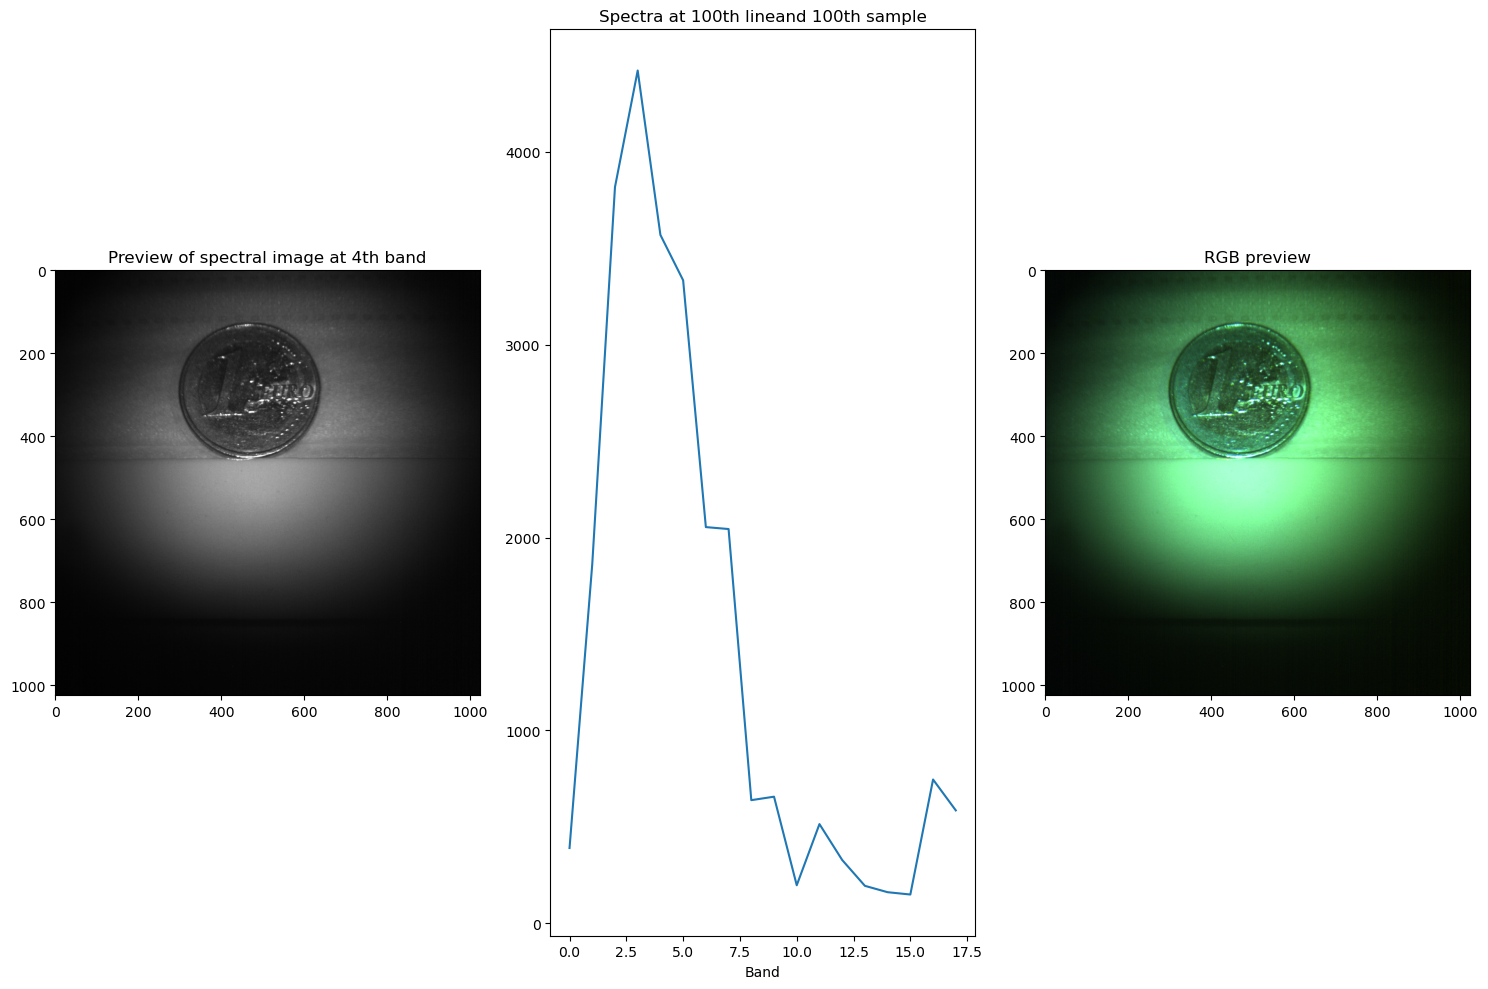

In [50]:
%matplotlib inline
fig, axes = plt.subplots(1, 3, tight_layout=True, figsize=(15, 10))
axes[0].imshow(raw_image[:, :, 4], cmap="gray")
axes[0].set_title("Preview of spectral image at 4th band")

axes[1].plot(raw_image[100, 100, :])
axes[1].set_title("Spectra at 100th lineand 100th sample")
axes[1].set_xlabel("Band")

# show RGB preview
rgb_preview = raw_image[:, :, [1, 4, 6]].astype(np.float32)
rgb_preview /= np.max(rgb_preview, axis=(0, 1))
rgb_preview *= 2
rgb_preview = np.clip(rgb_preview, 0, 1)
axes[2].imshow(rgb_preview)
axes[2].set_title("RGB preview")

plt.show()

In [37]:
np.max(rgb_preview, axis=(-1)).shape

(1024, 1024)